In [2]:
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
df = pd.read_csv('output_demo/lc2.csv')
df

,id,day,mu,sigma
0,1,4194,0.101707,0.962176
1,1,4196,0.102469,0.962644
2,54,5731,1.266686,0.557359
3,54,5745,1.282213,0.553642
4,54,5914,1.437972,0.509188
...,...,...,...,...
3984,138,6439,-0.799683,0.549641
3985,138,6440,-0.799508,0.549603
3986,138,6496,-0.795451,0.554301
3987,138,6510,-0.799535,0.556742


In [5]:
df = df[df['id'] != '_handicap19_1_']
df = df[df['id'] != '_komi19_0_']
df = df[df['id'] != '_komi19_1_']

first_day = date.fromisoformat('2001-01-01')
print(first_day)
df["date"] = df["day"].apply(lambda day: first_day + timedelta(days=day-1))
df  

2001-01-01


,id,day,mu,sigma,date
0,1,4194,0.101707,0.962176,2012-06-25
1,1,4196,0.102469,0.962644,2012-06-27
2,54,5731,1.266686,0.557359,2016-09-09
3,54,5745,1.282213,0.553642,2016-09-23
4,54,5914,1.437972,0.509188,2017-03-11
...,...,...,...,...,...
3984,138,6439,-0.799683,0.549641,2018-08-18
3985,138,6440,-0.799508,0.549603,2018-08-19
3986,138,6496,-0.795451,0.554301,2018-10-14
3987,138,6510,-0.799535,0.556742,2018-10-28


In [6]:
aago_df = pd.read_csv('../../data/aago/aago_filtered.csv')

In [7]:
def es7o13(n):
    return n == 7 or n == 13
print(es7o13(7))
print(es7o13(13))
print(es7o13(8))


True
True
False


In [8]:
laplagne_games = aago_df[aago_df['black'] == 7]
lap_gut_games = laplagne_games[laplagne_games['white'] == 13]
lap_gut_games

,index,id,created,modified,handicap,komi,result,reason,points,started,black,white,event_id,description,unrated,black_win,width
573,575,588,2017-09-01 04:05:58,2017-09-01 04:05:58,0,6.5,black,unknown,0.0,2017-07-22,7,13,24,NaN,0,True,19


In [9]:
gutierrez_games = aago_df[aago_df['black'] == 13]
gut_lap_games = gutierrez_games[gutierrez_games['white'] == 7]
gut_lap_games

,index,id,created,modified,handicap,komi,result,reason,points,started,black,white,event_id,description,unrated,black_win,width
292,292,301,2017-03-11 00:17:39,2017-03-11 00:17:39,4,0.5,black,resignation,0.0,2017-02-13,13,7,15,NaN,0,True,19
432,433,446,2017-05-06 19:50:17,2017-05-06 19:50:18,4,0.5,white,resignation,0.0,2017-04-10,13,7,19,NaN,0,False,19
537,538,551,2017-06-29 15:22:15,2017-06-29 15:22:15,4,0.5,black,resignation,0.0,2017-06-12,13,7,23,NaN,0,True,19
700,707,720,2017-10-05 23:52:48,2017-10-06 00:22:49,3,0.5,white,unknown,0.0,2017-09-11,13,7,27,NaN,0,False,19
1221,1232,1245,2018-04-02 17:21:50,2018-04-02 17:21:50,3,0.5,black,resignation,0.0,2018-03-26,13,7,34,NaN,0,True,19
1347,1358,1371,2018-05-28 03:54:43,2018-05-28 03:54:43,0,6.5,white,unknown,0.0,2018-05-27,13,7,37,NaN,0,False,19
3111,3140,3162,2020-04-10 02:29:19,2020-04-24 00:51:08,3,0.5,white,unknown,0.0,2020-03-08,13,7,71,NaN,0,False,19


In [10]:
lap_wins = pd.concat([lap_gut_games[lap_gut_games['result'] == 'black'], gut_lap_games[gut_lap_games['result'] == 'white']])
lap_wins

,index,id,created,modified,handicap,komi,result,reason,points,started,black,white,event_id,description,unrated,black_win,width
573,575,588,2017-09-01 04:05:58,2017-09-01 04:05:58,0,6.5,black,unknown,0.0,2017-07-22,7,13,24,NaN,0,True,19
432,433,446,2017-05-06 19:50:17,2017-05-06 19:50:18,4,0.5,white,resignation,0.0,2017-04-10,13,7,19,NaN,0,False,19
700,707,720,2017-10-05 23:52:48,2017-10-06 00:22:49,3,0.5,white,unknown,0.0,2017-09-11,13,7,27,NaN,0,False,19
1347,1358,1371,2018-05-28 03:54:43,2018-05-28 03:54:43,0,6.5,white,unknown,0.0,2018-05-27,13,7,37,NaN,0,False,19
3111,3140,3162,2020-04-10 02:29:19,2020-04-24 00:51:08,3,0.5,white,unknown,0.0,2020-03-08,13,7,71,NaN,0,False,19


In [11]:
gut_wins = pd.concat([lap_gut_games[lap_gut_games['result'] == 'white'], gut_lap_games[gut_lap_games['result'] == 'black']])
gut_wins

,index,id,created,modified,handicap,komi,result,reason,points,started,black,white,event_id,description,unrated,black_win,width
292,292,301,2017-03-11 00:17:39,2017-03-11 00:17:39,4,0.5,black,resignation,0.0,2017-02-13,13,7,15,NaN,0,True,19
537,538,551,2017-06-29 15:22:15,2017-06-29 15:22:15,4,0.5,black,resignation,0.0,2017-06-12,13,7,23,NaN,0,True,19
1221,1232,1245,2018-04-02 17:21:50,2018-04-02 17:21:50,3,0.5,black,resignation,0.0,2018-03-26,13,7,34,NaN,0,True,19


In [12]:
df['id'].value_counts().head(n=10)

14     116
7      112
18     111
35      92
15      92
27      91
50      86
126     72
53      72
16      70
Name: id, dtype: int64

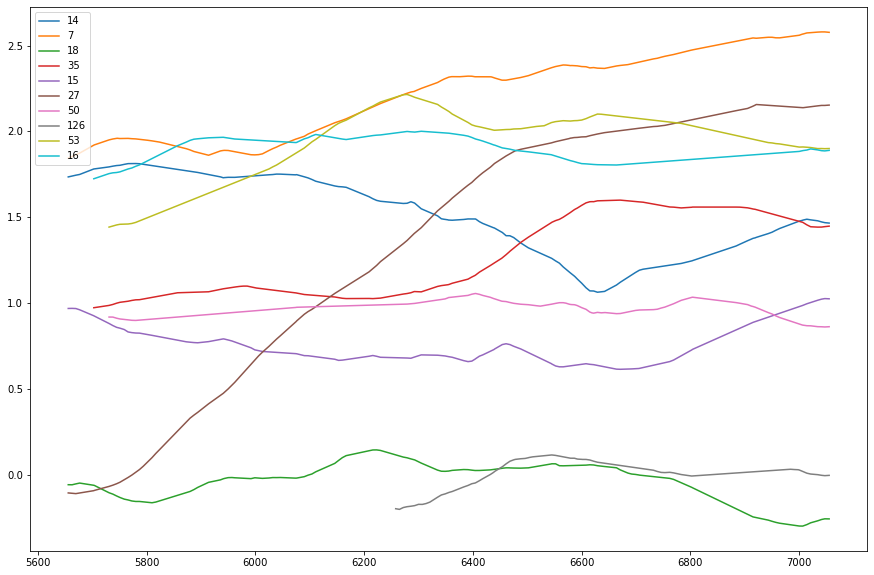

In [13]:
plt.figure(figsize=(15,10))
for id in (df['id'].value_counts().head(n=10).keys()): # df['id'].unique():
    lc_id = df[df['id'] == id]
    plt.plot(lc_id['day'], lc_id['mu'], label = id)
plt.legend()

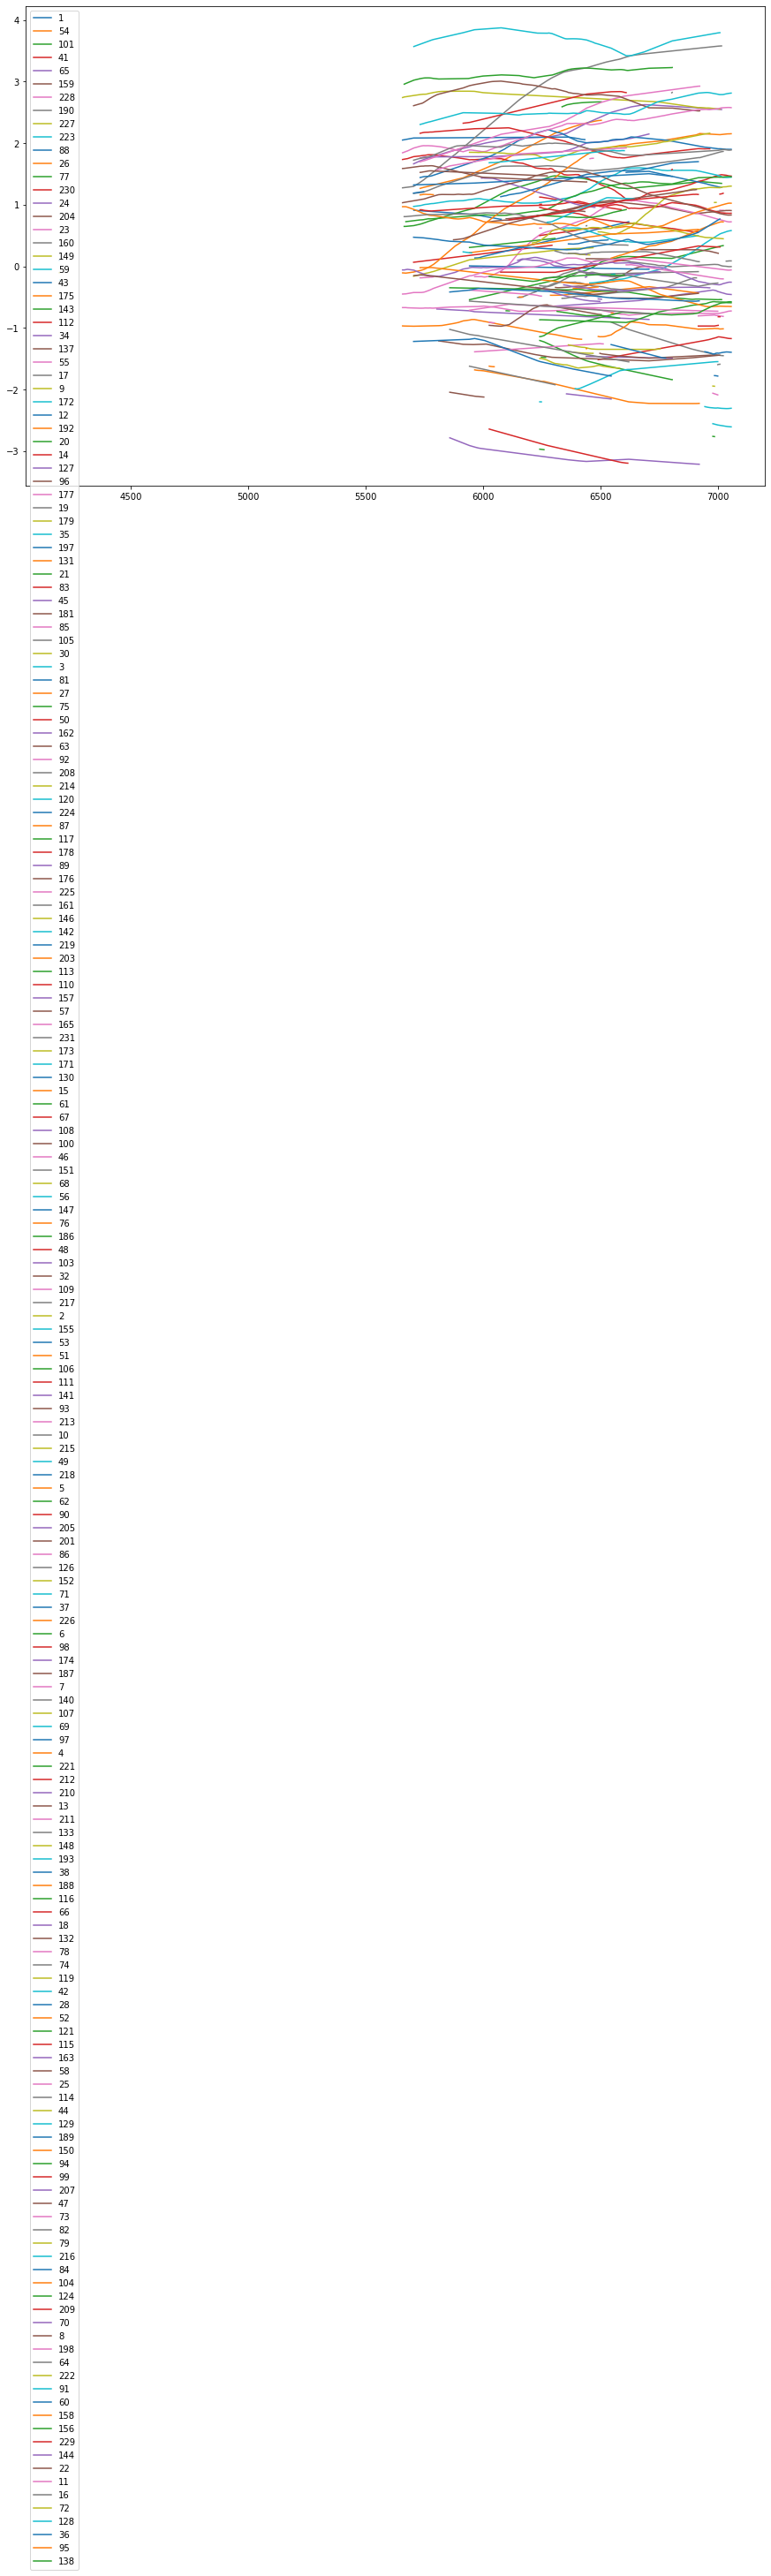

In [14]:
plt.figure(figsize=(15,10))
for id in df['id'].unique():
    lc_id = df[df['id'] == id]
    plt.plot(lc_id['day'], lc_id['mu'], label = id)
plt.legend()

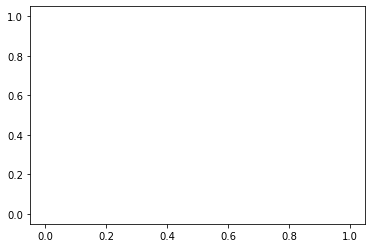

In [15]:
id = 53
lc_id = df[df['id'] == id]
plt.plot(lc_id['day'], lc_id['mu'], label = id)

AttributeError: 'AxesSubplot' object has no attribute 'label'

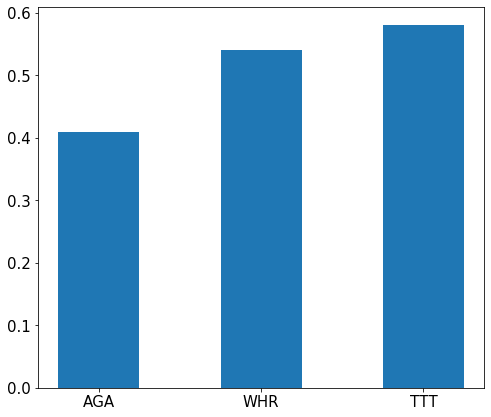

In [22]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(8)
bars = ax.bar(["AGA","WHR","TTT"], height = [0.41,0.54,0.58], width=0.5, align='center')
#ax.bar_label(bars)

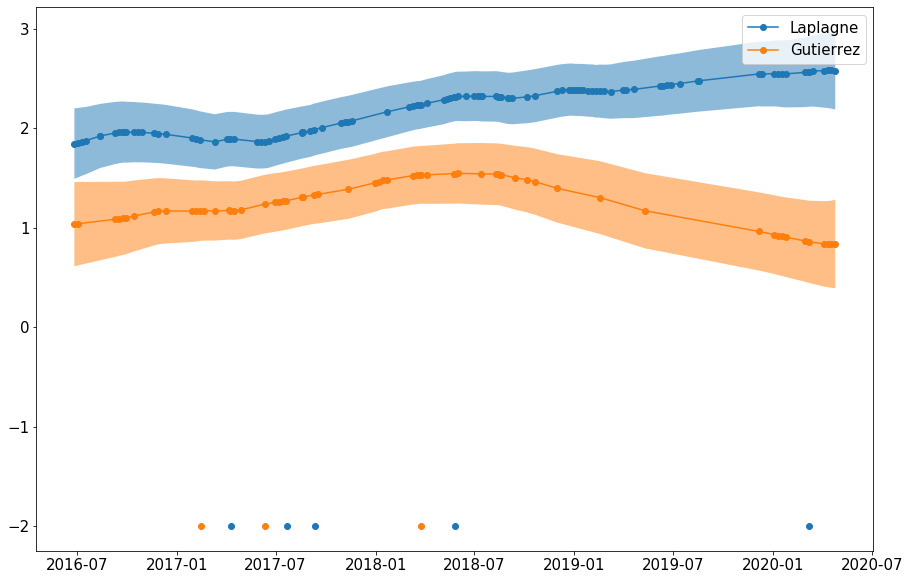

In [17]:
plt.figure(figsize=(15,10))
for id in ['7','13']:
    lc_id = df[df['id'] == id]
    plt.plot(lc_id['date'], lc_id['mu'],'-o', label = ("Laplagne" if id == '7' else "Gutierrez"))
    plt.fill_between(lc_id['date'], lc_id['mu']+lc_id['sigma'] , lc_id['mu']-lc_id['sigma'], alpha = 0.5) 
plt.legend()
plt.plot(lap_wins['started'].apply(lambda datetime : date.fromisoformat(datetime)), [-2 for i in range(len(lap_wins.index))],'o', color='tab:blue')
plt.plot(gut_wins['started'].apply(lambda datetime : date.fromisoformat(datetime)), [-2 for i in range(len(gut_wins.index))],'o', color='tab:orange')

In [18]:
compare_df = pd.read_csv('output_demo/compare_dict.csv')
compare_df = compare_df.rename(columns={"first": "day", "second": "win_prob"})
compare_df["date"] = compare_df["day"].apply(lambda day: first_day + timedelta(days=day-1))
compare_df=compare_df.sort_values(by='day')
compare_df

,day,win_prob,date
35,5656,0.703295,2016-06-26
92,5663,0.704496,2016-07-03
119,5670,0.707127,2016-07-10
117,5677,0.709349,2016-07-17
82,5703,0.720176,2016-08-12
...,...,...,...
57,7007,0.870461,2020-03-08
27,7014,0.871152,2020-03-15
7,7034,0.873425,2020-04-04
73,7041,0.873631,2020-04-11


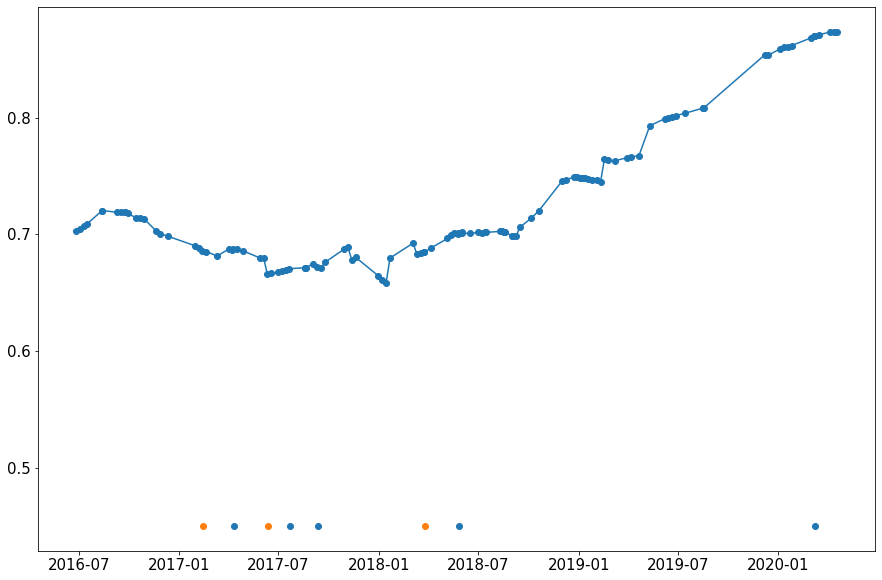

In [19]:
plt.figure(figsize=(15,10))
plt.plot(compare_df['date'], compare_df['win_prob'], '-o')
plt.plot(lap_wins['started'].apply(lambda datetime : date.fromisoformat(datetime)), [0.45 for i in range(len(lap_wins.index))],'o', color='tab:blue')
plt.plot(gut_wins['started'].apply(lambda datetime : date.fromisoformat(datetime)), [0.45 for i in range(len(gut_wins.index))],'o', color='tab:orange')

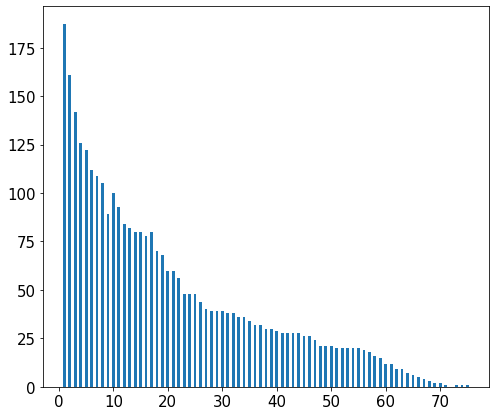

In [20]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(8)
bars = ax.bar(aago_df['event_id'].unique(), height = aago_df['event_id'].value_counts(), width=0.5, align='center')


In [17]:
aago_df[aago_df['started'] == 1]


,index,id,created,modified,handicap,komi,result,reason,points,started,black,white,event_id,description,unrated,black_win,width


,index,id,created,modified,handicap,komi,result,reason,points,started,black,white,event_id,description,unrated,black_win,width
573,575,588,2017-09-01 04:05:58,2017-09-01 04:05:58,0,6.5,black,unknown,0.0,2017-07-22,7,13,24,NaN,0,True,19


,index,id,created,modified,handicap,komi,result,reason,points,started,black,white,event_id,description,unrated,black_win,width
292,292,301,2017-03-11 00:17:39,2017-03-11 00:17:39,4,0.5,black,resignation,0.0,2017-02-13,13,7,15,NaN,0,True,19
432,433,446,2017-05-06 19:50:17,2017-05-06 19:50:18,4,0.5,white,resignation,0.0,2017-04-10,13,7,19,NaN,0,False,19
537,538,551,2017-06-29 15:22:15,2017-06-29 15:22:15,4,0.5,black,resignation,0.0,2017-06-12,13,7,23,NaN,0,True,19
700,707,720,2017-10-05 23:52:48,2017-10-06 00:22:49,3,0.5,white,unknown,0.0,2017-09-11,13,7,27,NaN,0,False,19
1221,1232,1245,2018-04-02 17:21:50,2018-04-02 17:21:50,3,0.5,black,resignation,0.0,2018-03-26,13,7,34,NaN,0,True,19
1347,1358,1371,2018-05-28 03:54:43,2018-05-28 03:54:43,0,6.5,white,unknown,0.0,2018-05-27,13,7,37,NaN,0,False,19
3111,3140,3162,2020-04-10 02:29:19,2020-04-24 00:51:08,3,0.5,white,unknown,0.0,2020-03-08,13,7,71,NaN,0,False,19


2001-01-01


datetime.date(2015, 7, 7)

2001-01-01


,id,day,mu,sigma,date
0,1,4194,0.539525,2.635086,2012-06-25
1,1,4196,0.561529,2.637109,2012-06-27
2,54,5731,0.099747,1.667122,2016-09-09
3,54,5745,0.178624,1.636589,2016-09-23
4,54,5914,0.577268,1.203087,2017-03-11
...,...,...,...,...,...
3984,138,6439,-4.780332,1.065601,2018-08-18
3985,138,6440,-4.777839,1.063562,2018-08-19
3986,138,6496,-4.633254,1.000804,2018-10-14
3987,138,6510,-4.716345,0.985048,2018-10-28
